In [1]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd

%matplotlib inline
plt.rcParams['figure.dpi'] = 130
# plt.rcParams['savefig.dpi'] = 300

# MENG 244 Lab 2

## Experimental Procedure:
**Part 1**
0.1 M NaOH and EtOAc flowed into PFR at room temp
1. 25 mL/min each until steady state

2. 50 mL/min each until steady state

3. Flush the reactor at 100 mL/min DI water each pump until L < 0.02 mS/cm

**Part 2** 1.0 M KCl with blue dye pulsed into PFR at room temp

To set up: Fill one reagent bottle with DI water and another with 150 mL of 1.0 M $KCl$ with blue dye. Run KCl pump at 50 mL/min $KCl$ until it reaches entrance to reactor

1. Practice 50 mL/min $H_2O$ for 1 min then quickly start and stop $KCL$ pump at 50 mL/min (after blue comes out of T-Junction); set $H_2O$ to 100 mL/min for 5 min

2. $H_2O$ at 50 mL/min; quick 50/0 mL/min $KCl$ for < 2 s; record change in vol; wait 10 min

3. Repeat with same speeds, recording change in vol $KCl$

4. Pulse for 100 mL/min $H_2O$ to get two measurements


## Part 1: Saponification of EtOAc using a Plugged Flow Reactor (PFR)

Using the following soponification reaction as our experimental model
$${NaOH} + {EtOAc} \longrightarrow {NaOAC} + {EtOH}$$
$${A} + {B} \longrightarrow {C} + {D}$$

For the PFR reaction, we operated under the following conditions:

$T_{Bath} =$ room temperature

$C_{NaOH,0} = 0.05 mol/dm^3$

$C_{EtOAC,0} = 0.05 mol/dm^3$

$\nu = (50, 100)$ mL/min

To invetigate the mean residence time, we use the following formula:
$$ k t_r a_0 = \frac{X_a}{1-X_a} $$
$$\Rightarrow t_r = \frac{X_a}{k a_0(1-X_a)} $$



### 1) Derivation of differential design and residence time equations from PFR mole balance



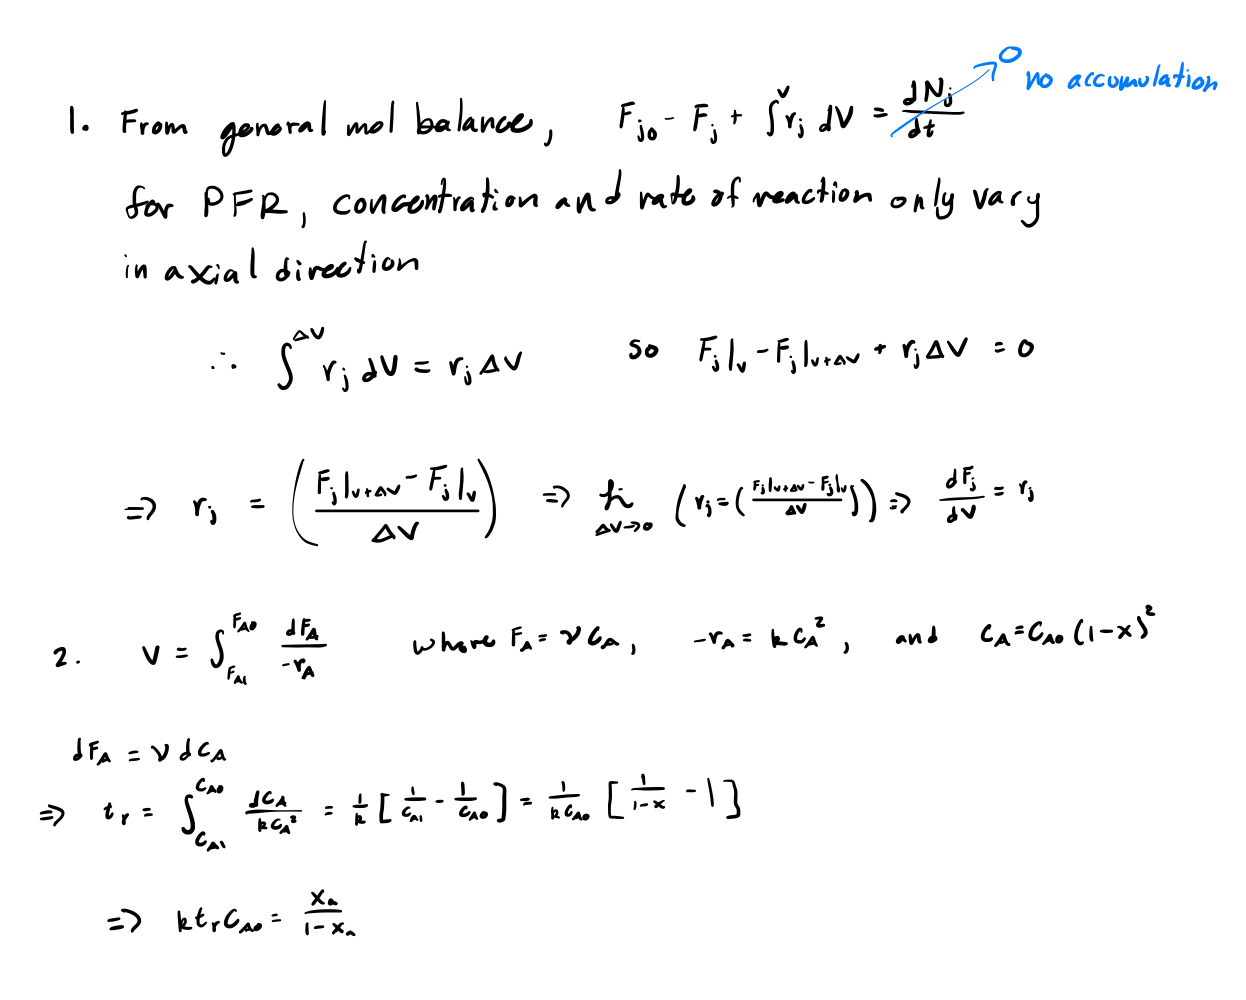

In [22]:
# importing derivation screenshot
from IPython.display import Image
Image('./IMG_778728E11890-1.jpeg')

### 2) Conversion of NaOH vs time and Steady State Conversion

In [2]:
# Saving tabulated values for partial conductivity
# Tabulated value data for each table: [(temperature, concentration, conductivity), ...]
data_NaOH_0_05 = np.array([
    (20.5, 0.05, 11.14),
    (24.5, 0.05, 11.96),
    (25.5, 0.05, 12.16),
    (27.5, 0.05, 12.61),
    (29.7, 0.05, 13.07),
    (31.4, 0.05, 13.48),
    (33.4, 0.05, 13.93),
    (35.4, 0.05, 14.33)
])
data_NaOH_0_01 = np.array([
    (22.5, 0.01, 1.98),
    (27.1, 0.01, 2.17),
    (28.1, 0.01, 2.20),
    (29.6, 0.01, 2.25),
    (31.3, 0.01, 2.33),
    (33.5, 0.01, 2.42),
    (35.4, 0.01, 2.45)
])
data_NaOH_0_001 = np.array([
    (23.8, 0.001, 0.19),
    (26.9, 0.001, 0.20),
    (30.3, 0.001, 0.21),
    (31.4, 0.001, 0.21),
    (33.4, 0.001, 0.22),
    (35.4, 0.001, 0.23)
])

data_NaOAc_0_1 = np.array([
    (24.9, 0.1, 7.04),
    (26.1, 0.1, 7.36),
    (27.6, 0.1, 7.78),
    (29.8, 0.1, 8.01),
    (31.4, 0.1, 8.33),
    (33.6, 0.1, 8.63),
    (33.5, 0.1, 9.09)
])
data_NaOAc_0_01 = np.array([
    (21.7, 0.01, 0.68),
    (24.5, 0.01, 0.73),
    (25.8, 0.01, 0.75),
    (27.7, 0.01, 0.79),
    (29.7, 0.01, 0.81),
    (31.5, 0.01, 0.85),
    (33.5, 0.01, 0.89),
    (35.4, 0.01, 0.93)
])
data_NaOAc_0_001 = np.array([
    (24.3, 0.001, 0.087),
    (30.5, 0.001, 0.10),
    (35.9, 0.001, 0.11)
])


In [3]:
# Reading in experimental data from excel file
run_data = pd.read_excel('Lab 2 Data Clean.xlsx', sheet_name=[0, 1, 2, 3, 4])
C_A0 = 0.05 # mol/L

# print(run_data[1].columns)

run1_T = np.array(run_data[0]['Temp of \nReactor \n \n[°C]']) 
run2_T = np.array(run_data[1]['Temp of \nReactor \n \n[°C]'])
run3_T = np.array(run_data[2]['Temp of \nReactor \n \n[°C]'])
run4_T = np.array(run_data[3]['Temp of \nReactor \n \n[°C]'])
run5_T = np.array(run_data[4]['Temp of \nReactor \n \n[°C]'])

run1_L = np.array(run_data[0]['Measured \nConductivity \n0-20 [mS/cm] \nrange'])
run2_L = np.array(run_data[1]['Measured \nConductivity \n0-20 [mS/cm] \nrange'])

# Removing first few data points to clean up data
run1_L = run1_L[38:]
run1_T = run1_T[38:]

# run2_L = run2_L[4:]
# run2_T = run2_T[4:]

# run3_L = run3_L[6:]
# run3_T = run3_T[6:]


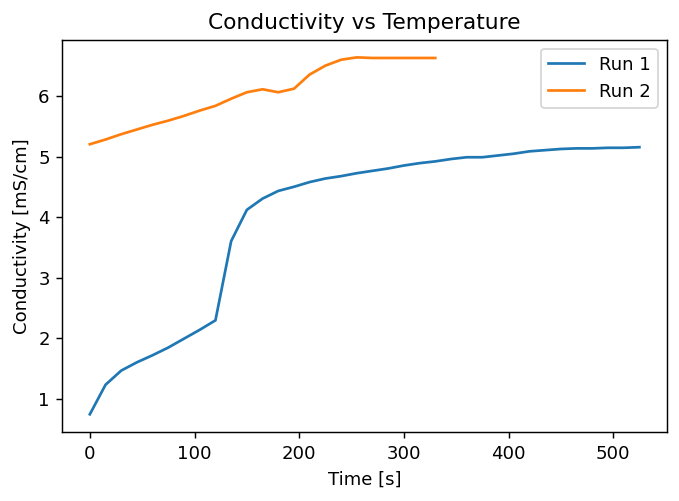

In [4]:
# Plotting experimental data
time_vec1 = np.arange(0, (len(run1_T))*15, 15)
time_vec2 = np.arange(0, (len(run2_T))*15, 15)

plt.plot(time_vec1 , run1_L , label='Run 1')
plt.plot(time_vec2 , run2_L, label='Run 2')

plt.xlabel('Time [s]')
plt.ylabel('Conductivity [mS/cm]')
plt.title('Conductivity vs Temperature')
plt.legend(['Run 1', 'Run 2'])

In [5]:
# Formatting tabulated and experimental data
# Combine the tabulated data
data_NaOH = list(data_NaOH_0_05) + list(data_NaOH_0_01) + list(data_NaOH_0_001)
data_NaOAc = list(data_NaOAc_0_1) + list(data_NaOAc_0_01) + list(data_NaOAc_0_001)

# Convert the data to numpy arrays and convert to K, M, mS/cm
data_NaOH = np.array(data_NaOH)
data_NaOAc = np.array(data_NaOAc)
data_NaOH[:,0]
data_NaOAc[:,0]

exp_Ts = list(run1_T) + list(run2_T) + list(run3_T) + list(run4_T) + list(run5_T)
exp_Ts = np.array(exp_Ts)
exp_Ts = np.unique(exp_Ts)

In [6]:
# Using linear interpolation to extrapolate data to experimental temperature range
def matrix_TCL(tabulated_vals, exp_Ts):
    # takes in a list of tuples of the form (Conc, tabulated_data), where tabulated_data is a numpy array of the form (T, C, L)
    mat_TCL_extrap = []
    for Conc, tab_TCL in tabulated_vals:
        # 1st order polynomial fit
        species_params = np.polyfit(tab_TCL[:,0], tab_TCL[:,2], 1)
        L_fit_T = np.poly1d(species_params)

        # sample the interpolated function at the experimental temperatures
        L_fit_exp_Ts = L_fit_T(exp_Ts)
        tabulated_Cs = np.ones(len(exp_Ts))*Conc

        # combine the experimental temperatures and extrapolated conductivities at tabulated concentrations
        matrix_k = np.vstack((exp_Ts, tabulated_Cs, L_fit_exp_Ts)).T
        mat_TCL_extrap += matrix_k.tolist()

    mat_TCL_extrap = np.array(mat_TCL_extrap)
    
    return mat_TCL_extrap

tabulated_vals_NaOH = [[0.05, data_NaOH_0_05], [0.01, data_NaOH_0_01], [0.001, data_NaOH_0_001]]
tabulated_vals_NaOAc = [[0.1, data_NaOAc_0_1], [0.01, data_NaOAc_0_01], [0.001, data_NaOAc_0_001]]

matrix_NaOH = matrix_TCL(tabulated_vals_NaOH, exp_Ts)
matrix_NaOAc = matrix_TCL(tabulated_vals_NaOAc, exp_Ts)

Text(0.5, 1.0, 'Estimated $\\Lambda_1$ vs $X_A$')

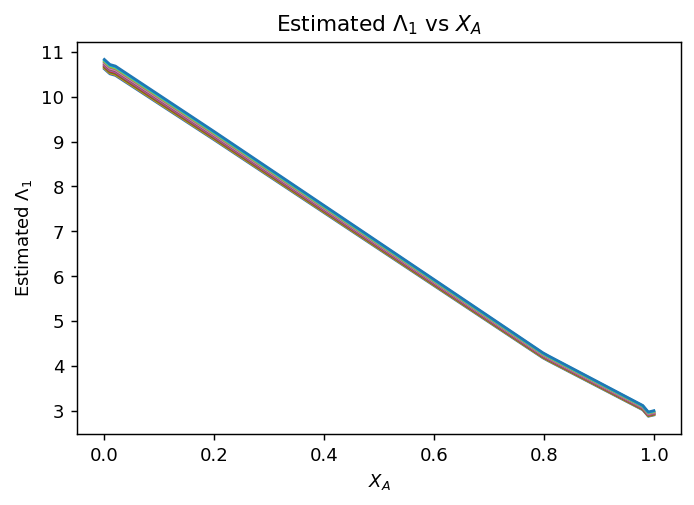

In [7]:
# Interpolating conductivity of NaOH and NaOAc
NaOH_points = matrix_NaOH[:, [0, 1]]  # The first and second columns: temperature and concentration
NaOH_values = matrix_NaOH[:, 2]       # The third column: conductivity

NaOAc_points = matrix_NaOAc[:, [0, 1]]
NaOAc_values = matrix_NaOAc[:, 2]

# 2D interpolations
def NaOH_interp_L(temperature, concentration):
    return griddata(NaOH_points, NaOH_values, (temperature, concentration), method='linear', fill_value=0.)

def NaOAc_interp_L(temperature, concentration):
    return griddata(NaOAc_points, NaOAc_values, (temperature, concentration), method='linear', fill_value=0.)

# Relating the concentrations of NaOH and NaOAc via conversion
X_vec = np.linspace(0,1,100)
C_a_vec = C_A0*(1-X_vec)
C_c_vec = C_A0*X_vec

# Relating total conductivity and temperature to the conversion of NaOH
C_a_vec, test_T1  = np.meshgrid(C_a_vec, exp_Ts)
C_c_vec, test_T2 = np.meshgrid(C_c_vec,  exp_Ts)

lambda_1a = NaOH_interp_L(test_T1, C_a_vec)
lambda_1c =  NaOAc_interp_L(test_T1, C_c_vec)
lambda_1 = lambda_1a + lambda_1c

for i in range(len(exp_Ts)):
    plt.plot(X_vec, lambda_1[i])
plt.xlabel(r'$X_A$')
plt.ylabel(r'Estimated $\Lambda_1$')
plt.title(r'Estimated $\Lambda_1$ vs $X_A$')

In [8]:
# Invert sum of partial conductivity interpolations to get conversion as a function of total conductivity and temperature
lambda_1_matrix = []
for i, conds in enumerate(lambda_1):
    Ts_i = [exp_Ts[i] for j in range(len(conds))]
    lambda_1_matrix.append(np.array([Ts_i, X_vec, conds]))

lambda_1_matrix = np.array(lambda_1_matrix)
new_arr = np.hstack(lambda_1_matrix).T

# print(new_arr.shape)
# print(new_arr)

tot_points = new_arr[:, [0, 2]]  # The first and second columns: temperature and conductivity
tot_values = new_arr[:, 1]       # The third column: concentrations

def tot_interp_X(temperature, conductivity):
    return griddata(tot_points, tot_values, (temperature, conductivity), method='cubic', fill_value=0.)

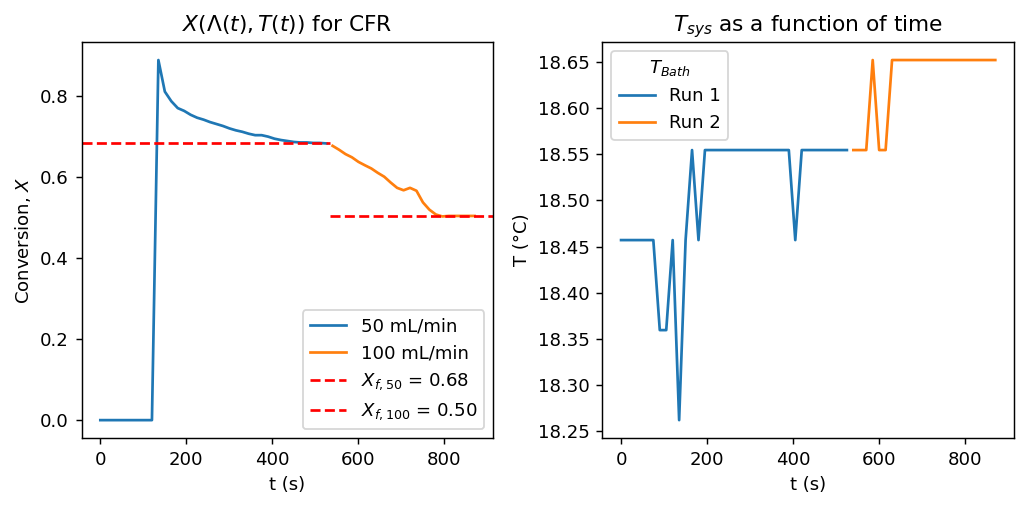

In [9]:
# Plot the interpolated conversion as a function of time

X_run1 = tot_interp_X(run1_T, run1_L)
X_run2 = tot_interp_X(run2_T, run2_L)

time_vec1 = np.arange(0, (len(run1_T))*15, 15)
time_vec2 = np.arange(0, (len(run2_T))*15, 15) + time_vec1[-1] + 15

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(time_vec1, X_run1)
ax[0].plot(time_vec2, X_run2)

ax[0].axhline(X_run1[-1], 0, time_vec1[-1]/time_vec2[-1], linestyle='--', color='red')
ax[0].axhline(X_run2[-1], time_vec1[-1]/time_vec2[-1], 1, linestyle='--', color='red')

ax[0].set_xlabel('t (s)')
ax[0].set_ylabel(r'Conversion, $X$')
ax[0].set_title(r'$X(\Lambda(t), T(t))$ for CFR')
ax[0].legend(['50 mL/min','100 mL/min', r'$X_{f, 50}$ = %.2f' % X_run1[-1], r'$X_{f, 100}$ = %.2f' % X_run2[-1]], loc='lower right')

ax[1].plot(time_vec1, run1_T)
ax[1].plot(time_vec2, run2_T)
ax[1].set_xlabel('t (s)')
ax[1].set_ylabel(r'T (°C)')
ax[1].set_title(r'$T_{sys}$ as a function of time')
ax[1].legend(['Run 1', 'Run 2'], title=r'$T_{Bath}$')

plt.tight_layout()

**discussion of Run1 X(t) behavior** For the first run, X peaks initially and then relaxes to the steady-state conversion because the interpolation function of conductivity assumes that $C_A + C_C = C_{A0}$ so if the conductivity is low, it must be because species C dominates the solution because it has a lower conductivity to concentration. However, this function does not account for transient periods when the total concentration of electrolyte has yet to reach $C_A0$.

### 3) Residence time ($t_r$) from steady-state conversion and Lab 1 kinetic parameters ; ideal space time ($ \tau $)

In [10]:
# Reaction Rate constant as a function of temperature from Batch data
ks_Burke = np.array([0.1104822, 0.28268191, 0.49728915])
Ts_Burke = np.array([297.63404948, 302.82354911, 307.63660714])
ks_Marks = np.array([0.168, 0.272, 0.3634]) # from Zach Mark's lab
Ts_Marks = np.array([25, 30, 35]) + 273.15

# Two-point Arrhenius fit
R = 8.314 # J/mol K

def Arrhenius_params(k1, k2, T1, T2):
    E_a = R * np.log(k1/k2) * (1/T2 - 1/T1)**-1
    A = k1 * np.exp(E_a/(R * T1))
    return E_a, A

def Arrhenius(A, E_a, T):
    return A * np.exp(-E_a/(R * T))

Arrhenius_Burke = Arrhenius_params(ks_Burke[1], ks_Burke[2], Ts_Burke[1], Ts_Burke[2]) # J/mol
Arrhenius_Marks = Arrhenius_params(ks_Marks[0], ks_Marks[2], Ts_Marks[0], Ts_Marks[2]) # J/mol

ks_Burke = Arrhenius(Arrhenius_Burke[1], Arrhenius_Burke[0], Ts_Burke)
ks_Marks = Arrhenius(Arrhenius_Marks[1], Arrhenius_Marks[0], Ts_Marks)

print(r'Burke lab Ks: {25°C: %.2f, 30°C: %.2f, 35°C: %.2f}' % tuple(ks_Burke))
print(r'Marks lab Ks: {25°C: %.2f, 30°C: %.2f, 35°C: %.2f}' % tuple(ks_Marks))

# Predicting the reaction rate constant for PFR temps

run1_meanT = np.mean(run1_T) + 273.15
run2_meanT = np.mean(run2_T) + 273.15
# print(r'Run 1 mean T: %.2f; Run 2 mean T: %.2f' % (run1_meanT, run2_meanT))

run1_k_Burke = Arrhenius(Arrhenius_Burke[1], Arrhenius_Burke[0], run1_meanT)
run2_k_Burke = Arrhenius(Arrhenius_Burke[1], Arrhenius_Burke[0], run2_meanT)

run1_k_Marks = Arrhenius(Arrhenius_Marks[1], Arrhenius_Marks[0], run1_meanT)
run2_k_Marks = Arrhenius(Arrhenius_Marks[1], Arrhenius_Marks[0], run2_meanT)

print(r'Run 1 k_Burke: %f; Run 2 k_Burke: %f' % (run1_k_Burke, run2_k_Burke))
print(r'Run 1 k_Marks: %f; Run 2 k_Marks: %f' % (run1_k_Marks, run2_k_Marks))



Burke lab Ks: {25°C: 0.15, 30°C: 0.28, 35°C: 0.50}
Marks lab Ks: {25°C: 0.17, 30°C: 0.25, 35°C: 0.36}
Run 1 k_Burke: 0.070969; Run 2 k_Burke: 0.072095
Run 1 k_Marks: 0.098969; Run 2 k_Marks: 0.099984


In [11]:
# Residence time from conversion, rate constant, and initial concentration
def t_r(X, k, a_0):
    return X/(k*a_0*(1-X))

# Space time from reactor volume and volumetric flow rate
def tau(V, nu):
    return V/nu

# Calculate residence time from steady state conversion for both flow rates
a_0 = C_A0 # M

# plt.plot(time_vec1, t_r(X_run1, k, a_0))
# plt.plot(time_vec2, t_r(X_run2, k, a_0))

# Calculate space time from reactor volume both volumetric flow rates
V = 0.466 # L
nu1 = .050/60 # L/s
nu2 = .100/60 # L/s

PFR_t_r1_Burke = t_r(X_run1[-1], run1_k_Burke, a_0)
PFR_t_r2_Burke = t_r(X_run2[-1], run2_k_Burke, a_0)

PFR_t_r1_Marks = t_r(X_run1[-1], run1_k_Marks, a_0)
PFR_t_r2_Marks = t_r(X_run2[-1], run2_k_Marks, a_0)

PFR_tau1 = tau(V, nu1)
PFR_tau2 = tau(V, nu2)

print('PFR ideal space time, tau, for 50 mL/min: %.2f s' % PFR_tau1)
print('PFR ideal space time, tau, for 100 mL/min: %.2f s' % PFR_tau2)

print('\nUsing Buke lab Arrhenius-predicted k')
print('PFR residence time, t_r, for 50 mL/min: %.2f s' % PFR_t_r1_Burke)
print('PFR residence time, t_r, for 100 mL/min: %.2f s' % PFR_t_r2_Burke)


print('\nUsing Marks lab Arrhenius-predicted k')
print('PFR residence time, t_r, for 50 mL/min: %.2f s' % PFR_t_r1_Marks)
print('PFR residence time, t_r, for 100 mL/min: %.2f s' % PFR_t_r2_Marks)

percent_diff = lambda x, y: np.abs(x-y)/((x+y)/2) * 100

print('\nPercent difference between PFR residence time and ideal space time for Burke lab Arrhenius-predicted k:')
print('Percent difference for 50 mL/min: %.2f%%' % percent_diff(PFR_t_r1_Burke, PFR_tau1))
print('Percent difference for 100 mL/min: %.2f%%' % percent_diff(PFR_t_r2_Burke, PFR_tau2))


PFR ideal space time, tau, for 50 mL/min: 559.20 s
PFR ideal space time, tau, for 100 mL/min: 279.60 s

Using Buke lab Arrhenius-predicted k
PFR residence time, t_r, for 50 mL/min: 606.50 s
PFR residence time, t_r, for 100 mL/min: 281.67 s

Using Marks lab Arrhenius-predicted k
PFR residence time, t_r, for 50 mL/min: 434.91 s
PFR residence time, t_r, for 100 mL/min: 203.10 s

Percent difference between PFR residence time and ideal space time for Burke lab Arrhenius-predicted k:
Percent difference for 50 mL/min: 8.11%
Percent difference for 100 mL/min: 0.74%


**discussion of error:**

The Percent difference in Burke lab space time and residence time for each of the running conditions is 8.11% and 0.74% respectively.

The error in residence time is dominated by the error in k values. Investigating 2 different lab groups' batch data (operating under similar conditions) for k and keeping the other parameters constant, we find that the calculated residence times fluctuate dramatically. For one set of ks, t_r is an overestimate of tau and for the other t_r is a dramatic underestimate of tau. The differences in the k data originates from batch reaction experimental error (non-constant temperature within runs, imperfect mixing, conductivity and temperature read-out noise, initial concentration accuracy) and analytical error (interpolation techniques for concentration, smoothing techniques, fitting techniques for k, different treatments of temperature fluctuations) with the highest contributing source of error being the fitting techniques for k. Furthermore, using Arrhenius law to calculate the rate constant is an extrapolation for this temperature range and assumes a rate determining step with a rate constant that follows the Arrhenius law.

While the error in residence time is dominated by the error in k, the conversion data is also affected by PFR non-ideality such as non-constant temperature, using extrapolated tabulated conductivity data for temperature ranges outside of the literature values, bubles in the tube affecting both flowrate and volume.

## Part 2: Residence Time Distribution
We calculate the mean residence time using the following equation:
$$E(t)=\frac{\nu C(t)}{N_0}$$
From the residence time distribution, we can find the mean residence time
$$ t_m = \int_{0}^{\infty} t E(t) dt $$

### 4) Plotting residence time distribution function, E(t), for each flow rate

In [12]:
# Saving tabulated values of KCl conductivity

kcl_data_0_1 = np.array([
    (5, 0.1, 8.22),
    (10, 0.1, 9.33),
    (15, 0.1, 10.48),
    (16, 0.1, 10.72),
    (17, 0.1, 10.95),
    (18, 0.1, 11.19),
    (19, 0.1, 11.43),
    (20, 0.1, 11.67),
    (21, 0.1, 11.91),
    (22, 0.1, 12.15),
    (23, 0.1, 12.39),
    (24, 0.1, 12.64),
    (25, 0.1, 12.88),
    (26, 0.1, 13.13),
])

kcl_data_0_01 = np.array([
    (5, 0.01, 0.896),
    (10, 0.01, 1.02),
    (15, 0.01, 1.147),
    (16, 0.01, 1.173),
    (17, 0.01, 1.199),
    (18, 0.01, 1.225),
    (19, 0.01, 1.251),
    (20, 0.01, 1.278),
    (21, 0.01, 1.305),
    (22, 0.01, 1.332),
    (23, 0.01, 1.359),
    (24, 0.01, 1.386),
    (25, 0.01, 1.413),
    (26, 0.01, 1.441),
])

kcl_data = np.concatenate((kcl_data_0_1, kcl_data_0_01), axis=0)

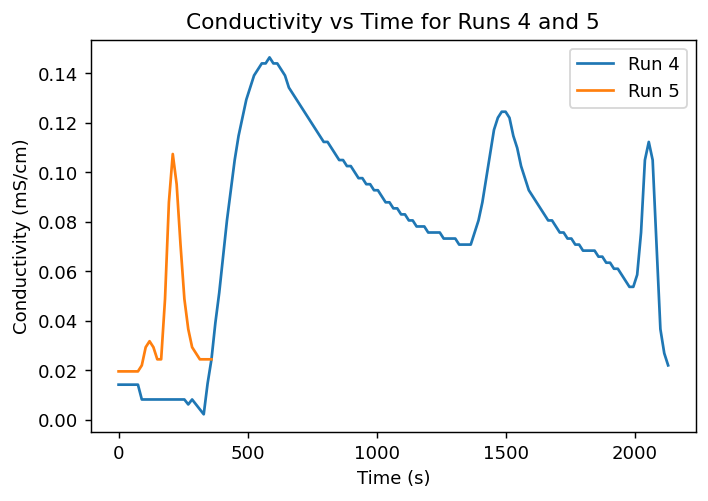

In [13]:
# run_data = pd.read_excel('Lab 2 Data Clean.xlsx', sheet_name=[0, 1, 2, 3, 4])
# print(run_data[3].columns)

run4_L = np.array(run_data[3]['Measured \nConductivity \n0-5 [mS/cm] \nrange'])
run5_L = np.array(run_data[4]['Measured \nConductivity \n0-5 [mS/cm] \nrange'])

run4_nu = np.array(run_data[3]['Acetate \nFlowrate \nFb \n[cm³/min]'])
run5_nu = np.array(run_data[4]['Acetate \nFlowrate \nFb \n[cm³/min]'])

time_vec4 = np.arange(0, (len(run4_T))*15, 15)
time_vec5 = np.arange(0, (len(run5_T))*15, 15)

plt.plot(time_vec4, run4_L)
plt.plot(time_vec5, run5_L)
plt.xlabel('Time (s)')
plt.ylabel('Conductivity (mS/cm)')
plt.title('Conductivity vs Time for Runs 4 and 5')
plt.legend(['Run 4', 'Run 5'])


Text(0.5, 0.98, 'Conductivity vs. Time for 50 and 100 mL/min Flowrate Pulse Experiments')

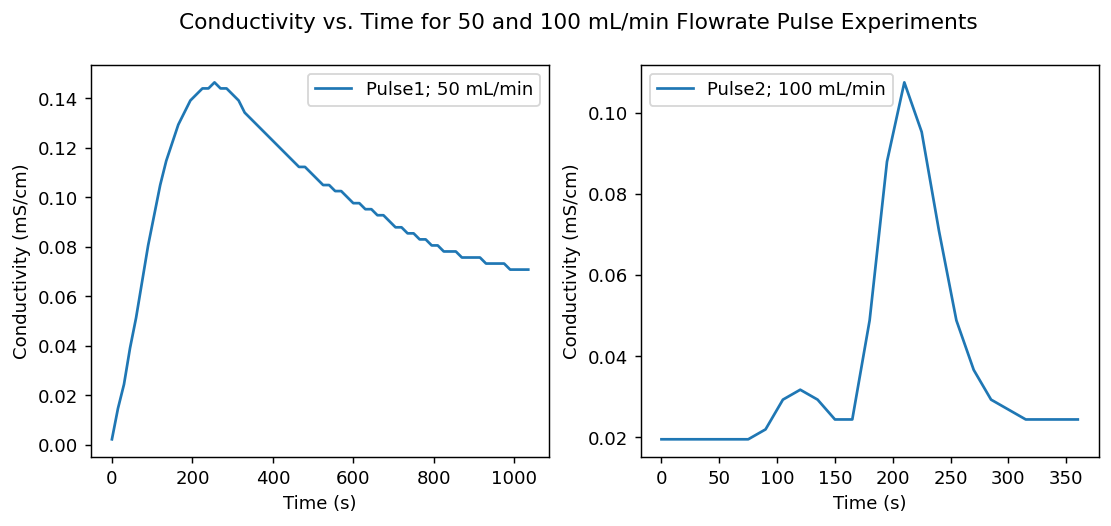

In [14]:
# Separating the pulses

# bounds separating the three pulse measurements in run 4
bound_run4_0 = 22 # index of where first pulse measurement begins
bound_run4_1 = 92 # index of where first pulse measurement ends and second pulse measurement begins
bound_run4_2 = 132 # index of where second pulse measurement ends and third pulse measurement begins

time_vec4_0 = np.arange(0, (len(run4_T[bound_run4_0:bound_run4_1]))*15, 15)
time_vec4_1 = np.arange(0, (len(run4_T[bound_run4_1:bound_run4_2]))*15, 15)
time_vec4_2 = np.arange(0, (len(run4_T[bound_run4_2:]))*15, 15)
time_vec5_0 = np.arange(0, (len(run5_T))*15, 15)

pulse4_0_L = run4_L[bound_run4_0:bound_run4_1]
pulse4_1_L = run4_L[bound_run4_1:bound_run4_2]
pulse4_2_L = run4_L[bound_run4_2:]
pulse5_0_L = run5_L

pulse4_0_T = run4_T[bound_run4_0:bound_run4_1]
pulse4_1_T = run4_T[bound_run4_1:bound_run4_2]
pulse4_2_T = run4_T[bound_run4_2:]
pulse5_0_T = run5_T


fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(time_vec4_0, pulse4_0_L, label='Pulse1; 50 mL/min')
# ax[0].plot(time_vec4_1, pulse4_1_L, label='Pulse2; 50 mL/min')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Conductivity (mS/cm)')
ax[0].legend()

# ax[1].plot(time_vec4_2, pulse4_2_L, label='Pulse1; 100 mL/min')
ax[1].plot(time_vec5_0, pulse5_0_L, label='Pulse2; 100 mL/min')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Conductivity (mS/cm)')
ax[1].legend()

fig.suptitle('Conductivity vs. Time for 50 and 100 mL/min Flowrate Pulse Experiments')

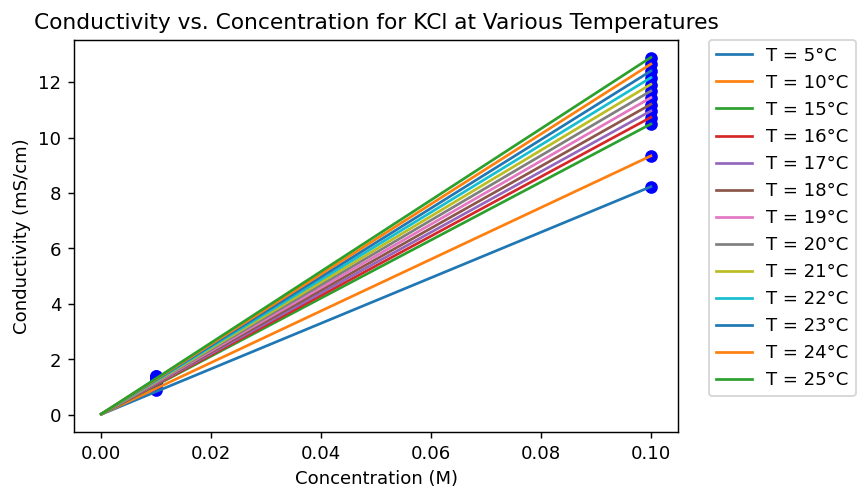

In [15]:
# Using linear extrapolation to fill in concentration values of KCl

kcl_C_vec = np.linspace(0, 0.1, 15)
kcl_data_temps = np.array([5, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

matrix_kcl = []
for i in range (len(kcl_data_temps)):
    # for each temperature, extrapolate the conductivity values for the missing concentrations

    # linear extrapolation weighting the origin
    params_i = np.polyfit([0,0,0,kcl_data_0_01[i, 1], kcl_data_0_1[i, 1] ], [0,0,0,kcl_data_0_01[i, 2], kcl_data_0_1[i, 2]], 1)
    kcl_L_i = np.poly1d(params_i)(kcl_C_vec)
    # print(kcl_L_i[0])

    for j in range(len(kcl_L_i)):
        matrix_kcl.append((kcl_data_temps[i], kcl_C_vec[j], kcl_L_i[j]))
    
    plt.plot(kcl_C_vec, kcl_L_i, label='T = ' + str(kcl_data_temps[i]) + '°C')
    plt.scatter([kcl_data_0_01[i, 1], kcl_data_0_1[i, 1] ], [kcl_data_0_01[i, 2], kcl_data_0_1[i, 2]], color='blue')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel('Concentration (M)')
plt.ylabel('Conductivity (mS/cm)')
plt.title('Conductivity vs. Concentration for KCl at Various Temperatures')

matrix_kcl = np.array(matrix_kcl)

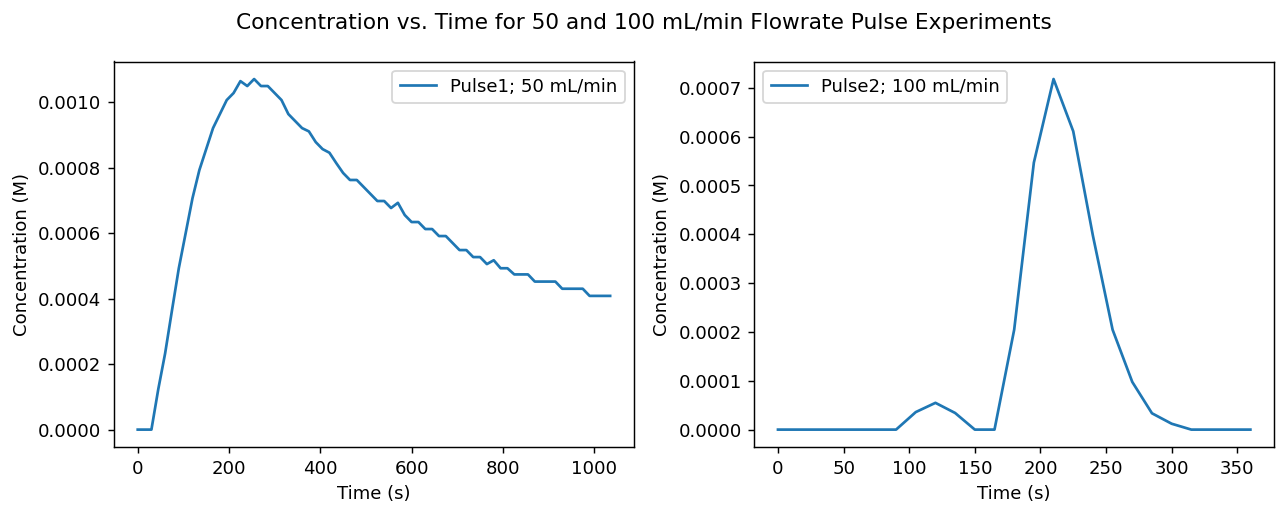

In [16]:
# Converting conductivity to concentration for pulses

# Interpolating conductivity of KCl
KCl_points = matrix_kcl[:, [0, 2]]  # The first and third columns: temperature and conductivity
KCl_values = matrix_kcl[:, 1]       # The second column: concentration


# 2D interpolations
def KCl_interp_C(temperature, conductivity):
    return griddata(KCl_points, KCl_values, (temperature, conductivity), method='linear', fill_value=0.)

pulse4_0_C = KCl_interp_C(pulse4_0_T, pulse4_0_L)
pulse4_1_C = KCl_interp_C(pulse4_1_T, pulse4_1_L)
pulse4_2_C = KCl_interp_C(pulse4_2_T, pulse4_2_L)
pulse5_0_C = KCl_interp_C(pulse5_0_T, pulse5_0_L)

# Plotting the interpolated concentration values
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(time_vec4_0, pulse4_0_C, label='Pulse1; 50 mL/min')
# ax[0].plot(time_vec4_1, pulse4_1_C, label='Pulse2; 50 mL/min')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Concentration (M)')
ax[0].legend()

# ax[1].plot(time_vec4_2, pulse4_2_C, label='Pulse1; 100 mL/min')
ax[1].plot(time_vec5_0, pulse5_0_C, label='Pulse2; 100 mL/min')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Concentration (M)')
ax[1].legend()

fig.suptitle('Concentration vs. Time for 50 and 100 mL/min Flowrate Pulse Experiments')
plt.tight_layout()

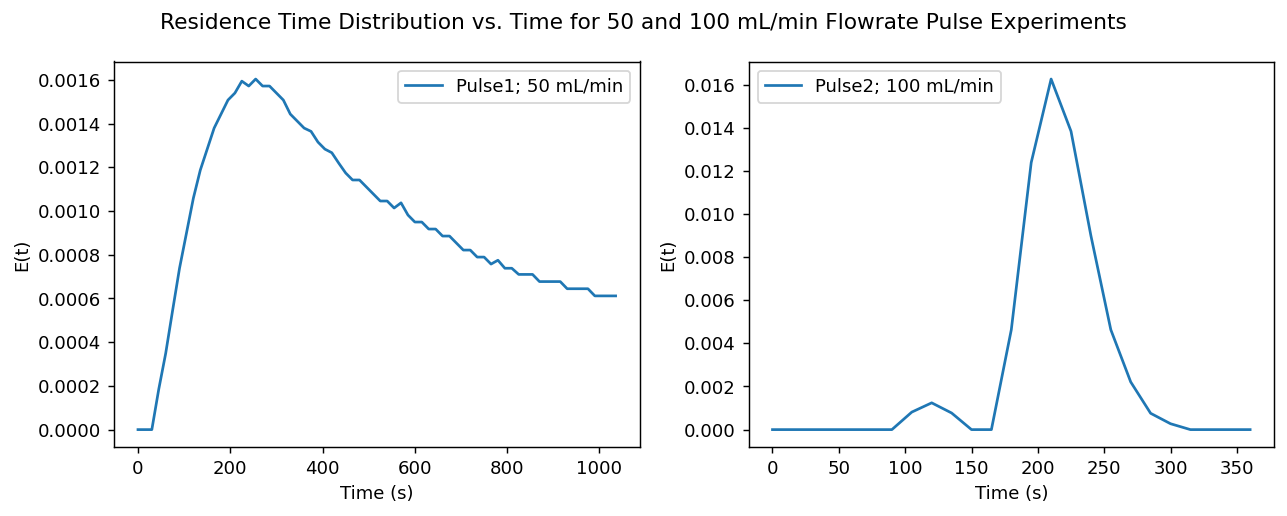

In [17]:
# Calculating the Residence Time Distribution (E(t)) for each pulse
import scipy.integrate as integrate

def E_t(C, nu, dt=15):

    # C * nu = dN/dt ; mol/L * mL/min * 1L/1000mL * 1min/60s = mol/s
    dN_dt = C * nu * (1/1000) * (1/60)  # mol/sx

    # Integrate to get N

    N_0 = integrate.simpson(dN_dt, dx=dt)  # mol
    
    return dN_dt / N_0

# Calculating the RTD for each pulse
pulse4_0_E = E_t(pulse4_0_C, 50)
pulse4_1_E = E_t(pulse4_1_C, 50)
pulse4_2_E = E_t(pulse4_2_C, 100)
pulse5_0_E = E_t(pulse5_0_C, 100)

# Plotting the RTD for each pulse
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(time_vec4_0, pulse4_0_E, label='Pulse1; 50 mL/min')
# ax[0].plot(time_vec4_1, pulse4_1_E, label='Pulse2; 50 mL/min')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('E(t)')
ax[0].legend()

# ax[1].plot(time_vec4_2, pulse4_2_E, label='Pulse1; 100 mL/min')
ax[1].plot(time_vec5_0, pulse5_0_E, label='Pulse2; 100 mL/min')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('E(t)')
ax[1].legend()

fig.suptitle('Residence Time Distribution vs. Time for 50 and 100 mL/min Flowrate Pulse Experiments')
plt.tight_layout()

### 5) Calculating the mean residence time, t_m for each pulse

Mean residence time for 50 mL/min: 480.13 s
Mean residence time for 100 mL/min: 214.64 s


Text(0.5, 1.0, 'tE(t) vs. Time for 50 and 100 mL/min Flowrate Pulse Experiments')

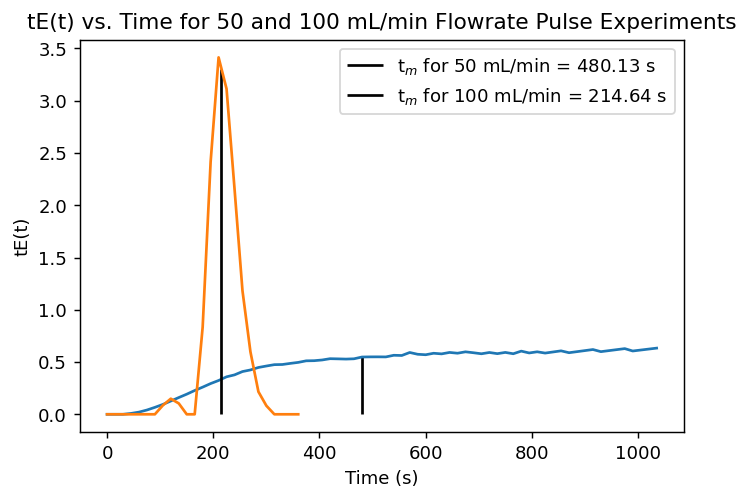

In [35]:
# computing the mean residence time for each pulse
def mean_residence_time(E, time_vec, dt=15):
    return integrate.simpson(E * time_vec, dx=dt)

t_mean4_0 = mean_residence_time(pulse4_0_E, time_vec4_0)
# t_mean4_1 = mean_residence_time(pulse4_1_E, time_vec4_1)
# t_mean4_2 = mean_residence_time(pulse4_2_E, time_vec4_2)
t_mean5_0 = mean_residence_time(pulse5_0_E, time_vec5_0)

print(r'Mean residence time for 50 mL/min: %.2f s' % t_mean4_0)
print(r'Mean residence time for 100 mL/min: %.2f s' % t_mean5_0)

plt.vlines(t_mean4_0, 0, 0.55, 'k', label=r't$_{m}$ for 50 mL/min = %.2f s' % t_mean4_0)
plt.plot(time_vec4_0, pulse4_0_E*time_vec4_0)
plt.vlines(t_mean5_0, 0, 3.3, 'k', label=r't$_{m}$ for 100 mL/min = %.2f s' % t_mean5_0)
plt.plot(time_vec5_0, pulse5_0_E*time_vec5_0)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('tE(t)')
plt.title('tE(t) vs. Time for 50 and 100 mL/min Flowrate Pulse Experiments')

### 6) Using the mean residence time, t_m,to predict conversions for the two flow rates of the PFR saponification reaction in part one
Now, looking again at the equation:
$$ k t_r a_0 = \frac{X_a}{1-X_a} $$

And solving for X_a:
$$ X_a = \frac{k t_r a_0}{1+k t_r a_a}$$

In [19]:
# Predicting the conversion for each pulse using t_m
X_a_tr = (lambda k, t_r, a_0=C_A0: (k * t_r * a_0) / (1 + k * t_r * a_0))


# Calculating the conversion for runs 1 and 2 using run1_k_Burke, run2_k_Burke and mean residence times
pulse4_0_X_a = X_a_tr(run1_k_Burke, t_mean4_0)
pulse5_0_X_a = X_a_tr(run1_k_Burke, t_mean5_0)

print('Conversion for saponification via mean residence times:')
print(r'Conversion for 50 mL/min: %.2f' % pulse4_0_X_a)
print(r'Conversion for 100 mL/min: %.2f' % pulse5_0_X_a)


Conversion for saponification via mean residence times:
Conversion for 50 mL/min: 0.63
Conversion for 100 mL/min: 0.43


### 7) Calculating the conversion from PFR design equations, and tabulating conversions

$$ V = \int_{F_{A1}}^{F_{A0}} \frac{dF_A}{-r_A} $$

Performing a u-substitution for molar flowrate:

$$ F_A = \nu C_{A0} (1-X) $$

$$dF_A = \nu C_{A0} d(1-X)$$

Plugging in the substitution and adjusting the bounds, and inserting the rate of reaction equation. Here one might also insert $ -r_A = k (C_{A0}(1-X))^{\alpha + \beta}$ where $(\alpha + \beta) > 1$ ; however this complicates the solving process, so we proceed assuming $(\alpha + \beta) = 2$

$$ V = \frac{\nu}{k C_{A0}} \int_{(1-X_a)}^{1} \frac{d(1-X)}{(1-X)^2} $$

Evaluating the integral

$$ V = \frac{\nu}{k C_{A0}} [\frac{1}{1-X_a} - 1] $$

$$ V = \frac{\nu}{k C_{A0}} \frac{X_a}{1-X_a} $$

Solving for $X_a$ in terms of the known volume and volumetric flow rate





$$ X_a  = \frac{(V / \nu ) k C_{A0}}{1 + (V / \nu) k C_{A0}} $$

$$ 

In [20]:
# Calculating the conversion for each pulse using design equations with V, nu, k_Burke, C_a0

X_a_design = (lambda V, nu, k, C_a0=C_A0: (V/nu)*k*C_a0 / (1 + (V/nu)*k*C_a0))

# Calculating the conversion for runs 1 and 2 using run1_k_Burke, run2_k_Burke and design equations
X_a_design_1 = X_a_design(0.466, 50/(1000*60), run1_k_Burke)
X_a_design_2 = X_a_design(0.466, 100/(1000*60), run2_k_Burke)


print('Conversion for saponification via design equations:')
print(r'Conversion for 50 mL/min: %.2f' % X_a_design_1)
print(r'Conversion for 100 mL/min: %.2f' % X_a_design_2)

Conversion for saponification via design equations:
Conversion for 50 mL/min: 0.66
Conversion for 100 mL/min: 0.50


In [21]:
# Create DataFrame
percent_err = lambda x, y: np.abs(x-y)/x * 100

predicted_error = (percent_err(pulse4_0_X_a, X_run1[-1]), percent_err(pulse5_0_X_a, X_run2[-1]))
calculated_error = (percent_err(X_a_design_1, X_run1[-1]), percent_err(X_a_design_2, X_run2[-1]))

data = {
    'Flow rate (mL/min per reactant)': (50, 100),
    'Observed Conversion': (X_run1[-1], X_run2[-1]),
    'Predicted Conversion (from t_m)': (pulse4_0_X_a, pulse5_0_X_a),
    'Calculated Conversion (from PFR Design Eq.)': (X_a_design_1, X_a_design_2),
    'Predicted Conversion % Error compared to Observed Conversion': predicted_error,
    'Calculated Conversion % Error compared to Observed Conversion': calculated_error
}

tabulated_results = pd.DataFrame(data)

# Format DataFrame
tabulated_results = tabulated_results.style.set_properties(**{
    'font-size': '12pt',
    'text-align': 'center',
    'background-color': 'lightgray',
    'color': 'black',
    'border-color': 'white'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', 'gray'), ('color', 'white')]
}])

# Display DataFrame
display(tabulated_results)




,Flow rate (mL/min per reactant),Observed Conversion,Predicted Conversion (from t_m),Calculated Conversion (from PFR Design Eq.),Predicted Conversion % Error compared to Observed Conversion,Calculated Conversion % Error compared to Observed Conversion
0,50,0.682754,0.630141,0.664912,8.349410,2.683267
1,100,0.503805,0.432348,0.501965,16.527754,0.366646


**discussion of differences** 

The observed conversion is slightly greater than the calculated conversion for both flow rates (although within 0.5% error for the 100 mL/min flow rate). The greater observed conversion can be attributed to the method of extrapolation to the operating temperature ranges, the method of interpolating the conductivity with few data points, air bubbles in the feed tubes or reactors changing the difference in initial concentrations of NaOH and EtOAc, drag inside of the reactor.

There is error in the predicted and calculated conversion due to the error in rate constant calculating which was discussed earlier. 

The predicted conversion from t_m experiments are both lower than the calculated conversion and observed conversion. The greater error here can be attributed to predicted t_ms that are too low. This can be attributed to not running the PFR for long enough after the pulses to capture the full relaxation of the KCl signal and using concentrations of KCl that were too low to produce reliable peaks, and the method of extrapolating KCl conductivity for low concentrations. 
